# Prep set

In [1]:
import pandas as pd
import ast

In [28]:
data="3m.json"
with open(data, 'r') as r:
    res=pd.DataFrame()
    for x in r:
        # json module doesn't work here - not valid JSON provided
        line=pd.DataFrame([ast.literal_eval(x)])
        res=res.append(line)

In [115]:
row=(dict(res[['business']].reset_index().iterrows())[0])
for x in row:
    print(x)


0
{'business_id': 'Aabr0G7IrxI03NhbsH5FDA', 'name': "Gold's Gym", 'neighborhood': '', 'address': '2805 W Centennial Pkwy', 'city': 'North Las Vegas', 'state': 'NV', 'postal_code': '89084', 'latitude': 36.2760401, 'longitude': -115.1791359, 'stars': 3.0, 'review_count': 29, 'is_open': 0, 'attributes': {'GoodForKids': True}, 'categories': ['Active Life', 'Fitness & Instruction', 'Gyms'], 'hours': {}}


In [126]:
res.index=pd.RangeIndex(len(res))

In [127]:
res.count()

business     91489
cool         91489
date         91489
funny        91489
review_id    91489
stars        91489
text         91489
useful       91489
user_id      91489
dtype: int64

In [128]:
res.groupby('cool').count()

,business,date,funny,review_id,stars,text,useful,user_id
cool,,,,,,,,
0,60495,60495,60495,60495,60495,60495,60495,60495
1,18413,18413,18413,18413,18413,18413,18413,18413
2,6271,6271,6271,6271,6271,6271,6271,6271
3,2625,2625,2625,2625,2625,2625,2625,2625
4,1279,1279,1279,1279,1279,1279,1279,1279
5,725,725,725,725,725,725,725,725
6,421,421,421,421,421,421,421,421
7,304,304,304,304,304,304,304,304
8,207,207,207,207,207,207,207,207


In [129]:
res.groupby('useful').count()

,business,cool,date,funny,review_id,stars,text,user_id
useful,,,,,,,,
0,32397,32397,32397,32397,32397,32397,32397,32397
1,23579,23579,23579,23579,23579,23579,23579,23579
2,13510,13510,13510,13510,13510,13510,13510,13510
3,7526,7526,7526,7526,7526,7526,7526,7526
4,4449,4449,4449,4449,4449,4449,4449,4449
5,2795,2795,2795,2795,2795,2795,2795,2795
6,1796,1796,1796,1796,1796,1796,1796,1796
7,1199,1199,1199,1199,1199,1199,1199,1199
8,931,931,931,931,931,931,931,931


In [130]:
res.groupby('funny').count()

,business,cool,date,review_id,stars,text,useful,user_id
funny,,,,,,,,
0,65018,65018,65018,65018,65018,65018,65018,65018
1,14647,14647,14647,14647,14647,14647,14647,14647
2,5233,5233,5233,5233,5233,5233,5233,5233
3,2415,2415,2415,2415,2415,2415,2415,2415
4,1297,1297,1297,1297,1297,1297,1297,1297
5,791,791,791,791,791,791,791,791
6,534,534,534,534,534,534,534,534
7,347,347,347,347,347,347,347,347
8,286,286,286,286,286,286,286,286


In [131]:
res['text'].loc[2]

'I have been to JP 3 times now.  Sadly I have learned to never go on a Saturday AM or you have to wait forever to be seated and to be served.  Go during the week and you will be fine.  I always go with a coupon or buy one get one free deal as they are a bit pricey.  The food is delicious!!!  The place is not very fance, very simple but the people always seem nice.'

In [141]:
pd.set_option('display.max_rows', 800)
res.groupby(lambda a: len(res['text'].loc[a].split(' '))).count()

,business,cool,date,funny,review_id,stars,text,useful,user_id
1,2,2,2,2,2,2,2,2,2
2,15,15,15,15,15,15,15,15,15
3,14,14,14,14,14,14,14,14,14
4,28,28,28,28,28,28,28,28,28
5,38,38,38,38,38,38,38,38,38
6,66,66,66,66,66,66,66,66,66
7,123,123,123,123,123,123,123,123,123
8,131,131,131,131,131,131,131,131,131
9,189,189,189,189,189,189,189,189,189
10,199,199,199,199,199,199,199,199,199


In [142]:
pd.set_option('display.max_rows', 0)

In [143]:
def get_reviews(like_type):
    pos=res[res[like_type]>2].sample(n=10000).copy()
    pos['classification']=like_type
    neg=res[res[like_type]==0].sample(n=10000).copy()
    neg['classification']='not-'+like_type
    all=pd.concat([pos, neg])
    all=all[['text', like_type, 'classification', 'stars', 'business']].reset_index(drop=True)
    return all

# Classification

In [144]:
import nltk
toker=nltk.tokenize.TweetTokenizer()

In [169]:
like_type='useful'
like_type='funny'
#like_type='cool'

In [170]:
reviews=get_reviews(like_type)

ValueError: Cannot take a larger sample than population when 'replace=False'

total number of words: 3330748
unique words: 60249
words present only once: 29904


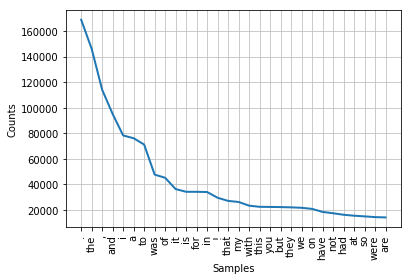

In [171]:
texts_tokenized = (toker.tokenize(row.text) for index, row in reviews.iterrows())
all_words = nltk.FreqDist(w.lower() for tokens in texts_tokenized for w in tokens)

print('total number of words:', sum(all_words.values()))
print('unique words:', len(all_words))
print('words present only once:', sum(c for c in all_words.values() if c == 1))

all_words.plot(30)

feature words: 29945


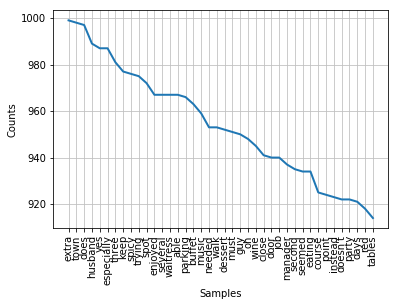

In [172]:
words = all_words.copy()
for w, count in all_words.items():
    if count > 1000 or count == 1:
        del words[w]

print('feature words:', len(words))
words.plot(40)

In [173]:
word_features = frozenset(words.keys())

def features(row):
    text=row.text
    txt_words = set(toker.tokenize(text.lower()))
    features = {}
    for w in txt_words & word_features:
        #features['contains({})'.format(w)] = 'Yes' # beze slov je to lepsi
        pass
    
    text=toker.tokenize(text.lower())
    for w,w2 in zip(text[:-1], text[1:]):
        if w in word_features and w2 in word_features:
                features['contains({}&&&{})'.format(w,w2)] = 'Yes'
                
    #features['contains(@@stars{})'.format(row.stars)] = 'Yes'
    features['@@@stars'] = row.stars
    features['@@@bus_stars']=row['business']['stars']
    features['@@@review_count']= "A lot" if row['business']['review_count']  else "A few"
    l=len(row['text'].split(' '))
    features['@@@review_length']= "short" if l<50 else "middle" if l<150 else "long"
    
    return features

In [ ]:
# generate tuples: (features_dict, sentiment)
feature_sets = [(features(row), row.classification) for index, row in reviews.iterrows()]

In [ ]:
feature_sets[0]

# Model training

In [ ]:
    import random
    random.shuffle(feature_sets)
    train_set, test_set = feature_sets[:10000], feature_sets[10000:]
    len(feature_sets)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
classifier.show_most_informative_features(30)

In [23]:
# import pickle

#with open('sentiment_classifier.pickle', 'wb') as f:
 #   pickle.dump(classifier, f)

In [24]:
#train('useful')

In [25]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [26]:
print(nltk.classify.accuracy(classifier, test_set))

0.532


In [27]:
classifier.pseudocode() #tohle nefunguje --- proc???

TypeError: '<' not supported between instances of 'str' and 'NoneType'